# HON Metrics
Computing some metrics from the higher-order network.

In [1]:
import signac
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

project = signac.get_project()
job = project.find_jobs({"year": 2011, "quarter": 1}).next()

In [2]:
hon = pd.read_csv(job.fn('hon_network.txt'), header=None, names=['source', 'dest', 'weight'])
def splitter(state_node):
    state_node = state_node.rstrip('|').split('|')
    state_node.extend(state_node.pop().split('.'))
    return state_node
hon.source = hon.source.apply(splitter)
hon.dest = hon.dest.apply(splitter)
hon['source_len'] = hon.source.apply(len)
hon['dest_len'] = hon.dest.apply(len)

In [3]:
np.average(hon.source_len, weights=hon.weight)

1.8189152195885787

In [4]:
np.average(hon.dest_len, weights=hon.weight)

2.393950802163022

In [5]:
def weighted_bar_plot(key, title):
    plt.figure(figsize=(4, 3), dpi=400)
    weights = hon.groupby(key).sum()['weight']
    weights /= weights.sum()
    label = 'Average: {:.3f}'.format(np.average(hon[key], weights=hon.weight))
    weights.plot('bar', label=label)
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    plt.close()

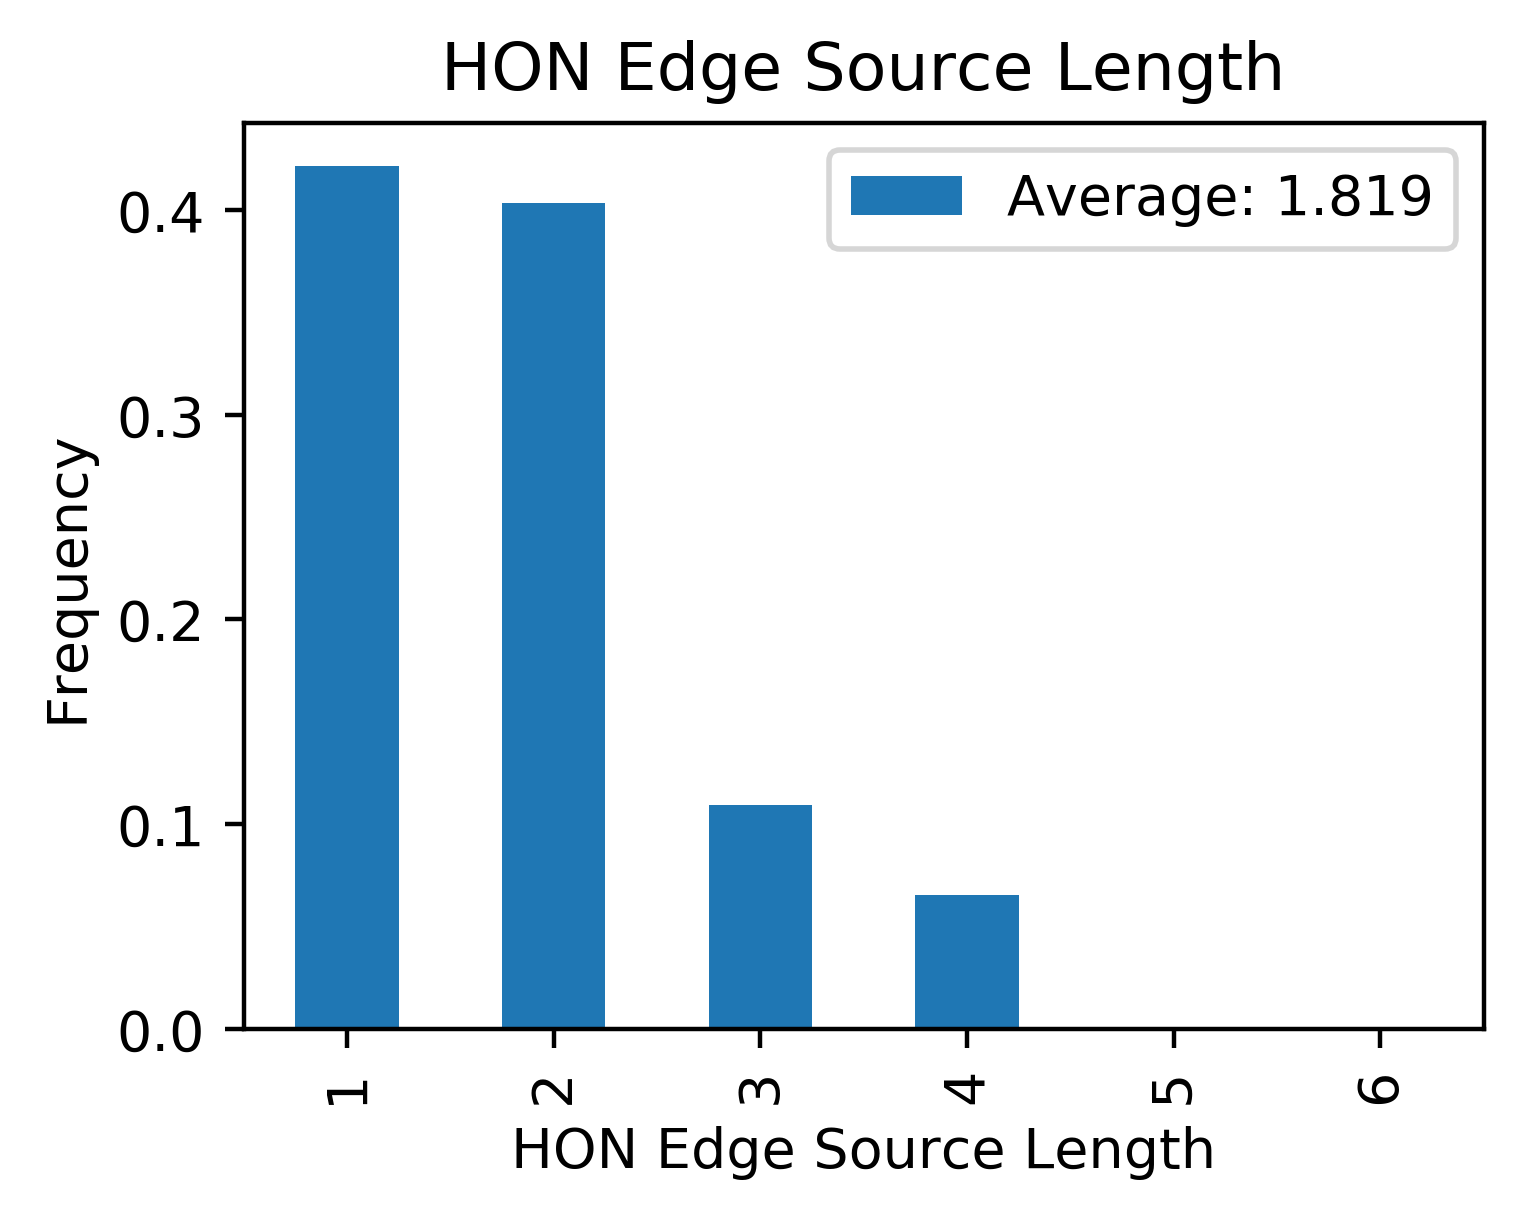

In [6]:
weighted_bar_plot('source_len', 'HON Edge Source Length')

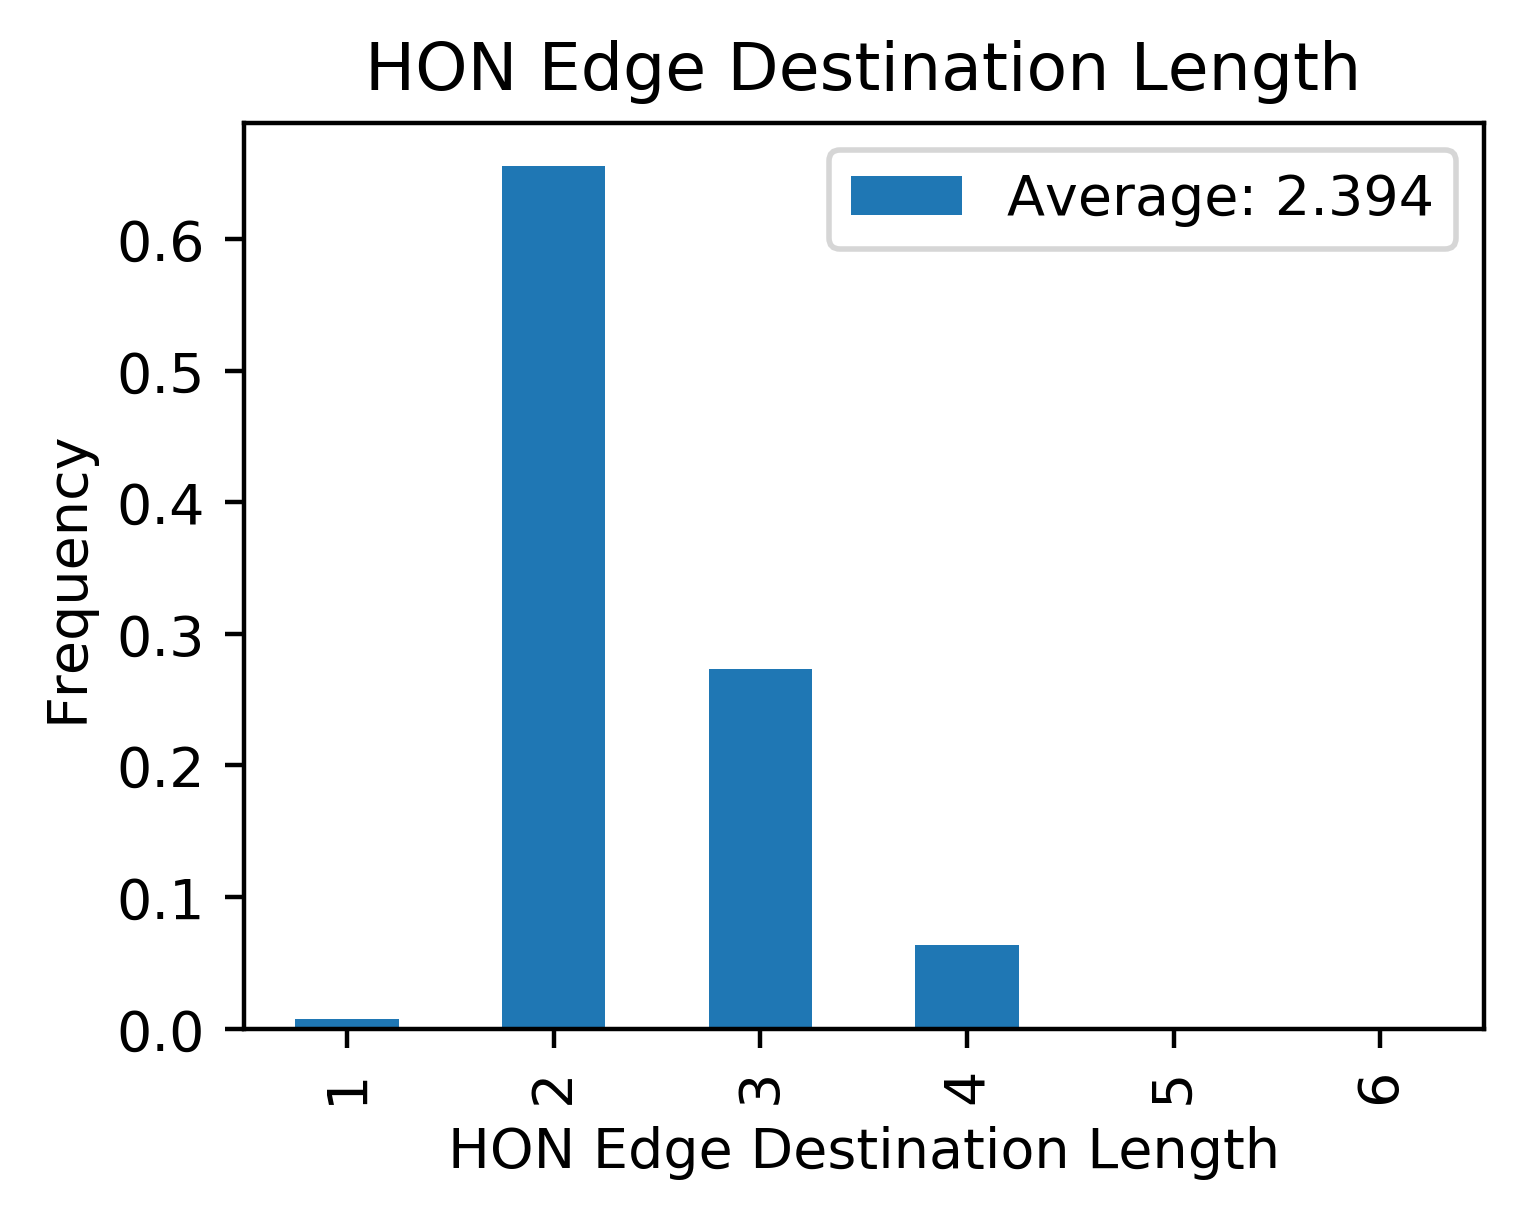

In [7]:
weighted_bar_plot('dest_len', 'HON Edge Destination Length')

In [8]:
def cumulative_stats(key):
    weights = hon.groupby(key).sum()['weight']
    weights /= weights.sum()
    cum_weights = weights.cumsum()
    for i, c in enumerate(cum_weights):
        print('{}, {:.5f}, {:.5f}'.format(i+1, c, 1-c))

In [9]:
cumulative_stats('source_len')

1, 0.42171, 0.57829
2, 0.82529, 0.17471
3, 0.93441, 0.06559
4, 0.99972, 0.00028
5, 0.99995, 0.00005
6, 1.00000, 0.00000


In [10]:
cumulative_stats('dest_len')

1, 0.00742, 0.99258
2, 0.66311, 0.33689
3, 0.93593, 0.06407
4, 0.99964, 0.00036
5, 0.99995, 0.00005
6, 1.00000, 0.00000
